In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import treadmill
import timeit

In [3]:
def draw_plot(sizes, times):
    z = np.polyfit(sizes, times, 1)
    p = np.poly1d(z)
    
    plt.plot(sizes, times, '.')
    plt.plot(sizes, p(sizes), 'r--')
    plt.show()

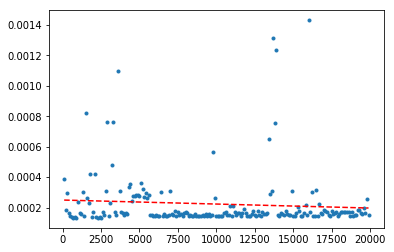

In [4]:
def create_heap(size):
    return treadmill.Heap(get_roots=lambda: [], get_children=lambda x: [], initial_size=size, scan_threshold=0)

sizes = range(100, 20000, 100)
times = []

for size in sizes:
    time = timeit.timeit('heap.allocate()', setup='heap = create_heap(size)', number=50, globals=globals())
    times.append(time)

draw_plot(sizes, times)

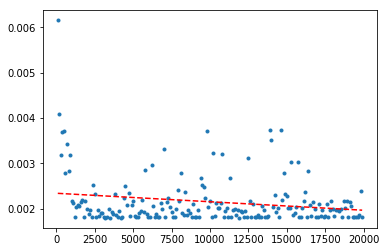

In [37]:
def create_heap(size):
    roots = []
    
    def get_roots():
        return roots
    
    heap = treadmill.Heap(get_roots=get_roots,
                          get_children=lambda obj: [], 
                          initial_size=size, 
                          scan_threshold=1, 
                          scan_step_size=10)
    
    roots = [heap.allocate() for _ in range(30)]
    
    return heap

sizes = range(100, 20000, 100)
times = []

for size in sizes:
    time = timeit.timeit('heap.allocate()', setup='heap = create_heap(size)', number=50, globals=globals())
    times.append(time)

draw_plot(sizes, times)

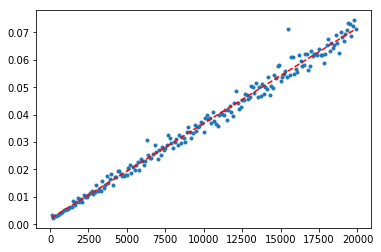

In [41]:
def create_heap(size, num_roots):
    roots = []
    
    def get_roots():
        return roots
    
    heap = treadmill.Heap(get_roots=get_roots,
                          get_children=lambda obj: [], 
                          initial_size=size, 
                          scan_threshold=1, 
                          scan_step_size=10)
    
    roots = [heap.allocate() for _ in range(num_roots)]
    
    return heap

heap_size = 30000
root_sizes = range(100, 20000, 100)
times = []

for root_size in root_sizes:
    time = timeit.timeit('heap.allocate()', setup='heap = create_heap(heap_size, root_size)', number=50, globals=globals())
    times.append(time)

draw_plot(root_sizes, times)